In [1]:
import os
print(os.listdir("../input/flowers/flowers"))

['daisy', 'sunflower', 'tulip', 'rose', 'dandelion']


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.applications import VGG16


# Data directory paths
DATA = '../input/flowers/flowers'


# Image Size on data
IMG_SIZE= ( 320, 240 )

# Number of Labels
NUM_LABELS = 5

# Temp Batch sizes
TRAIN_BATCH_SIZE = 91  # steps per epoch = 38
TEST_BATCH_SIZE = 173  # steps for validation 5

Using TensorFlow backend.


In [3]:
    ####### VGG16
    import keras
    from keras.models import Sequential
    from keras.layers import *
    from keras.layers.core import *
    from keras.layers.normalization import BatchNormalization
    from keras.layers.convolutional import *
    from keras.preprocessing.image import ImageDataGenerator
    from keras.optimizers import *
    from keras.metrics import categorical_crossentropy
    from keras.applications import VGG16



    
    # Get a batch of training data of size 
    data_gen = ImageDataGenerator( rescale= 1./255,
                                   rotation_range=180,
                                   horizontal_flip=True,
                                   zoom_range=.4,
                                   width_shift_range=40,
                                   height_shift_range=40,
                                   validation_split=.2
                                 )
    train_batch = data_gen.flow_from_directory( DATA, 
                                                target_size=IMG_SIZE,
                                                batch_size=TRAIN_BATCH_SIZE,
                                                subset="training",
                                                class_mode="categorical",
                                                interpolation="nearest"
                                               )
    test_batch = data_gen.flow_from_directory( DATA,
                                               target_size=IMG_SIZE,
                                               batch_size=TEST_BATCH_SIZE,
                                               subset="validation",
                                               class_mode="categorical",
                                               interpolation="nearest"
                                             )
    # Image data ( height of 320, length of 240, image channel 3 for RGB )
    shape = ( 320, 240, 3 )
    
    vgg16_model = keras.applications.vgg16.VGG16( include_top=False,
                                                  weights='imagenet',
                                                  input_shape=shape )
    model = Sequential()
    
    i = 0
    for layer in vgg16_model.layers:
        if( i <= 6):
            layer.trainable=False
            model.add( layer )
            i += 1
        else:
            break
    vgg16_model.summary()

Found 3462 images belonging to 5 classes.
Found 861 images belonging to 5 classes.
58892288/58889256 [==============================] - 2s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 320, 240, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 320, 240, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 320, 240, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 160, 120, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 160, 120, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 160, 120, 128)     14758

In [4]:
# Convolution extracts 256 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(Conv2D(256, 3, activation = 'relu'))
model.add(MaxPooling2D(2))

# Convolution extracts 512 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(Conv2D(512, 3, activation='relu'))
model.add(MaxPooling2D(2))

# Convolution extracts 1024 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(Convolution2D(1024, 3, activation = 'relu'))
model.add(MaxPooling2D(2))


In [5]:
    
# Flatten the feature maps and add fully connected layer of 1024 hidden
# units with relu activation with dropout regulizer
model.add( Flatten() )
model.add( Dense( 1024, activation='relu') )
model.add( Dropout(0.5) )

In [6]:

"""
# CNN structure from Assignment 3
# Convolutional Layer 16 3x3 filters
# MaxPool 2x2
# Convolution 32 3x3 filters
# MaxPool 2x2
# Convolution 64 3x3 filters
# MaxPool 2x2
# Flatten with 512 hidden nodes with dropout
model = Sequential([ Conv2D(16, 3, input_shape=shape ),
                    MaxPooling2D(2),
                    Conv2D( 32, 3, activation='relu'),
                    MaxPooling2D(2),
                    Conv2D( 64, 3, activation='relu'),
                    MaxPooling2D(2),
                    Flatten(),
                    Dense( 512,activation= 'relu'),
                    Dropout(0.5),
                    Dense(NUM_LABELS, activation='softmax')
                   ]) """

"\n# CNN structure from Assignment 3\n# Convolutional Layer 16 3x3 filters\n# MaxPool 2x2\n# Convolution 32 3x3 filters\n# MaxPool 2x2\n# Convolution 64 3x3 filters\n# MaxPool 2x2\n# Flatten with 512 hidden nodes with dropout\nmodel = Sequential([ Conv2D(16, 3, input_shape=shape ),\n                    MaxPooling2D(2),\n                    Conv2D( 32, 3, activation='relu'),\n                    MaxPooling2D(2),\n                    Conv2D( 64, 3, activation='relu'),\n                    MaxPooling2D(2),\n                    Flatten(),\n                    Dense( 512,activation= 'relu'),\n                    Dropout(0.5),\n                    Dense(NUM_LABELS, activation='softmax')\n                   ]) "

In [7]:
output = model.add( Dense(NUM_LABELS, activation='softmax') )          
model.compile( optimizer = Adam( lr=.0001 ), loss='categorical_crossentropy', metrics=['accuracy'] )
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 320, 240, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 320, 240, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 160, 120, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 160, 120, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 160, 120, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 80, 60, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 78, 58, 256)       295168    
__________

In [8]:
history = model.fit_generator( train_batch,
                               steps_per_epoch=38, 
                               epochs=20,
                               validation_data=test_batch,
                               validation_steps=5,
                               verbose=1 )

Epoch 1/20
38/38 [==============================] - 95s 2s/step - loss: 11.8430 - acc: 0.2047 - val_loss: 8.1601 - val_acc: 0.2462
Epoch 2/20
38/38 [==============================] - 68s 2s/step - loss: 3.5403 - acc: 0.3140 - val_loss: 1.2927 - val_acc: 0.5029
Epoch 3/20
38/38 [==============================] - 68s 2s/step - loss: 1.1639 - acc: 0.5126 - val_loss: 1.0909 - val_acc: 0.5598
Epoch 4/20
38/38 [==============================] - 68s 2s/step - loss: 1.1027 - acc: 0.5426 - val_loss: 0.9985 - val_acc: 0.5947
Epoch 5/20
38/38 [==============================] - 67s 2s/step - loss: 0.9447 - acc: 0.6128 - val_loss: 0.8936 - val_acc: 0.6365
Epoch 6/20
38/38 [==============================] - 68s 2s/step - loss: 0.9570 - acc: 0.6209 - val_loss: 0.9345 - val_acc: 0.6376
Epoch 7/20
38/38 [==============================] - 69s 2s/step - loss: 0.8985 - acc: 0.6478 - val_loss: 0.8796 - val_acc: 0.6434
Epoch 8/20
38/38 [==============================] - 67s 2s/step - loss: 0.8487 - acc: 0.6

Text(0.5,1,'Training and validation loss')

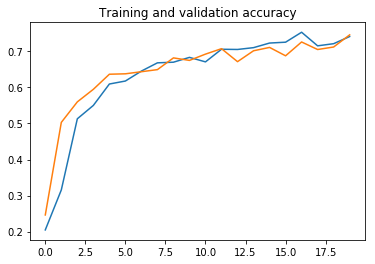

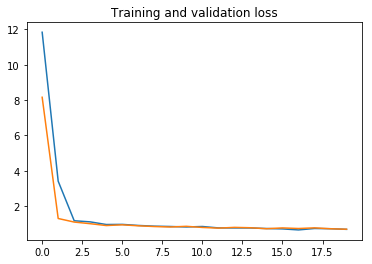

In [9]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')